<center>

# Predicción de aprobacion de un préstamo

</center>

##  Introducción

*Aquí va la introducción. Se redacta cuando el proyecto esté listo.*

##  Antecedentes

En el ámbito de los servicios financieros, las entidades bancarias y crediticias deben evaluar cuidadosamente a los solicitantes de préstamos para tomar decisiones informadas sobre su aprobación. Diversas variables relacionadas con las características personales, laborales y financieras de los solicitantes influyen directamente en la probabilidad de que un préstamo sea aprobado. Factores como el ingreso mensual, el historial crediticio, el estado civil, el tipo de empleo, el monto solicitado y el número de dependientes pueden tener un impacto significativo en la decisión final.

Con base en esta información, las instituciones financieras buscan optimizar sus procesos de evaluación de riesgo crediticio. Para ello, recurren al uso de técnicas de Machine Learning, que permiten construir modelos predictivos capaces de estimar la probabilidad de aprobación de un préstamo a partir de las características del solicitante. Esto no solo mejora la eficiencia operativa, sino que también contribuye a una asignación más justa y precisa del crédito.

## Definición del problema

Las entidades financieras que otorgan préstamos personales enfrentan el desafío de estimar con precisión la probabilidad de aprobación de una solicitud de crédito. Si bien existen múltiples factores que pueden influir en esta decisión como el ingreso del solicitante, su historial crediticio, el monto del préstamo solicitado o el número de dependientes no siempre es evidente cuáles son los más determinantes ni cómo interactúan entre sí. Esta falta de claridad, junto con la ausencia de insumos analíticos confiables para medir el riesgo del préstamo, complica significativamente la labor de estas instituciones. En particular, dificulta la evaluación precisa del riesgo crediticio, la asignación eficiente del crédito y la personalización adecuada de productos financieros, lo que puede derivar en decisiones erróneas, aumento de la morosidad y pérdida de competitividad en el mercado. 


## Justificación 

El desarrollo de un modelo predictivo que analice los factores personales y financieros de los solicitantes que tienen mayor influencia en la aprobación de préstamos, representa una herramienta de gran valor estratégico para las instituciones financieras. Al identificar con mayor precisión las variables más determinantes en la decisión crediticia, este tipo de modelo facilita los procesos de evaluación del riesgo, permitiendo una asignación de crédito más informada y eficiente. 

Además, la capacidad de predecir el riesgo asociado a cada solicitud facilita la creación de productos crediticios más personalizados, justos y alineados con el perfil de cada cliente, mejorando tanto la experiencia del usuario como la rentabilidad de la entidad. De esta manera, se promueve una toma de decisiones más estratégica y basada en datos, lo cual es fundamental en un entorno financiero cada vez más competitivo y orientado a la gestión proactiva del riesgo. 



## Objetivo general

Desarrollar un modelo de aprendizaje automático que prediga la aprobación o rechazo de una solicitud de préstamo personal, con el fin de apoyar a las instituciones financieras en la toma de decisiones estratégicas relacionadas con la evaluación de riesgos, la asignación de crédito y la personalización de productos financieros, basándose en las características personales, laborales y financieras de los solicitantes.

### Objetivos específicos

- Realizar un análisis exploratorio del conjunto de datos de Loan Status Prediction para depurar datos, identificar patrones y relaciones entre las variables.
- Entrenar modelos predictivos utilizando algoritmos de regresión para encontrar la variable objetivo Loan_Status: Loan approved (Y/N).
- Evaluar el rendimiento de los modelos para medir la precisión de las predicciones y seleccionar el que tenga el mejor desempeño.
- Realizar la optimización de hiperparámetros del modelo selecionado para mejorar su rendimiento.
- Desarrollar un sistema automatizado que permita utilizar las predicciones del modelo para predecir la variable objetivo Loan_Status: Loan approved (Y/N).



## Descripción del conjunto de datos
Este conjunto de datos disponible en Kaggle contiene información sobre solicitudes de préstamos personales y cada fila representa a un solicitante, incluyendo datos como:
- El ingreso del solicitante y ingreso del co-solicitante
- El monto del préstamo
- El historial crediticio, el estado civil y el tipo de empleo
- El estado del préstamo (aprobado o rechazado)
Este dataset nos permite analizar qué características influyen más en la aprobación de un préstamo personal.

## Características del Dataset
- Datos numéricos: Tiene números como el ingreso del solicitante, el ingreso del co-solicitante, el monto del préstamo y el historial crediticio.
- Datos categóricos: Incluye cosas como el estado civil, el tipo de empleo y el estado del préstamo (aprobado/rechazado).
- Variedad de datos: Es un dataset que mezcla datos fáciles de organizar (como números y categorías) con otros más variados como características personales, lo que lo hace interesante para analizar desde diferentes perspectivas.

### Resumen:
- Loan_ID: Identificador único del préstamo. (Cadena de texto)
- Gender: Género del solicitante (Male/Female). (Cadena de texto)
- Married: Estado civil (Yes/No). (Cadena de texto)
- Dependents: Número de personas dependientes. (Cadena de texto o entero)
- Education: Nivel educativo (Graduate/Not Graduate). (Cadena de texto)
- Self_Employed: Trabajador independiente (Yes/No). (Cadena de texto)
- ApplicantIncome: Ingreso del solicitante. (Entero)
- CoapplicantIncome: Ingreso del co-solicitante. (Entero)
- LoanAmount: Monto del préstamo (en miles). (Decimal)
- Loan_Amount_Term: Plazo del préstamo (en meses). (Entero)
- Credit_History: Historial crediticio (1 = cumple, 0 = no cumple). (Entero)
- Property_Area: Zona de residencia (Urban/Semiurban/Rural). (Cadena de texto)
- Employment_Type: Tipo de empleo. (Cadena de texto)
- Loan_Status: Estado del préstamo (Y = Aprobado, N = Rechazado). (Cadena de texto - variable objetivo) >> Variable objetivo


## Tamaño del Dataset
- 614 registros (solicitantes de préstamos)
- 13 columnas con distintas características personales y financieras 

## Limitaciones
- No incluye información detallada sobre el historial crediticio
- Puede haber sesgos en la distribución de datos (por ejemplo, más solicitantes aprobados que rechazados)
- No se especifica el año de recolección de los datos, lo que limita el análisis temporal

## Acceso al Dataset
El conjunto de datos está disponible públicamente en la plataforma Kaggle, bajo el nombre "Loan Status Prediction Dataset".
Enlace: https://www.kaggle.com/datasets/bhavikjikadara/loan-status-prediction


## Muestra del Dataset

In [111]:
import sys
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Bibliotecas para crear el transformador de clusters
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.cluster import KMeans

 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler


from sklearn.compose import make_column_selector
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import OneHotEncoder
 

In [112]:
#prestamos = pd.read_csv('loan_data.csv')
#prestamosOriginal = pd.read_csv('loan_data_original.csv')
prestamos = pd.read_csv('loan_data_original.csv')

In [113]:
prestamos.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [114]:
prestamos["Loan_Status"].head()

0    N
1    Y
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [115]:
print(prestamos["Loan_Status"].unique())

['N' 'Y']


In [116]:
prestamos["Loan_Status"].head()

0    N
1    Y
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [117]:
prestamos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [118]:
prestamos.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


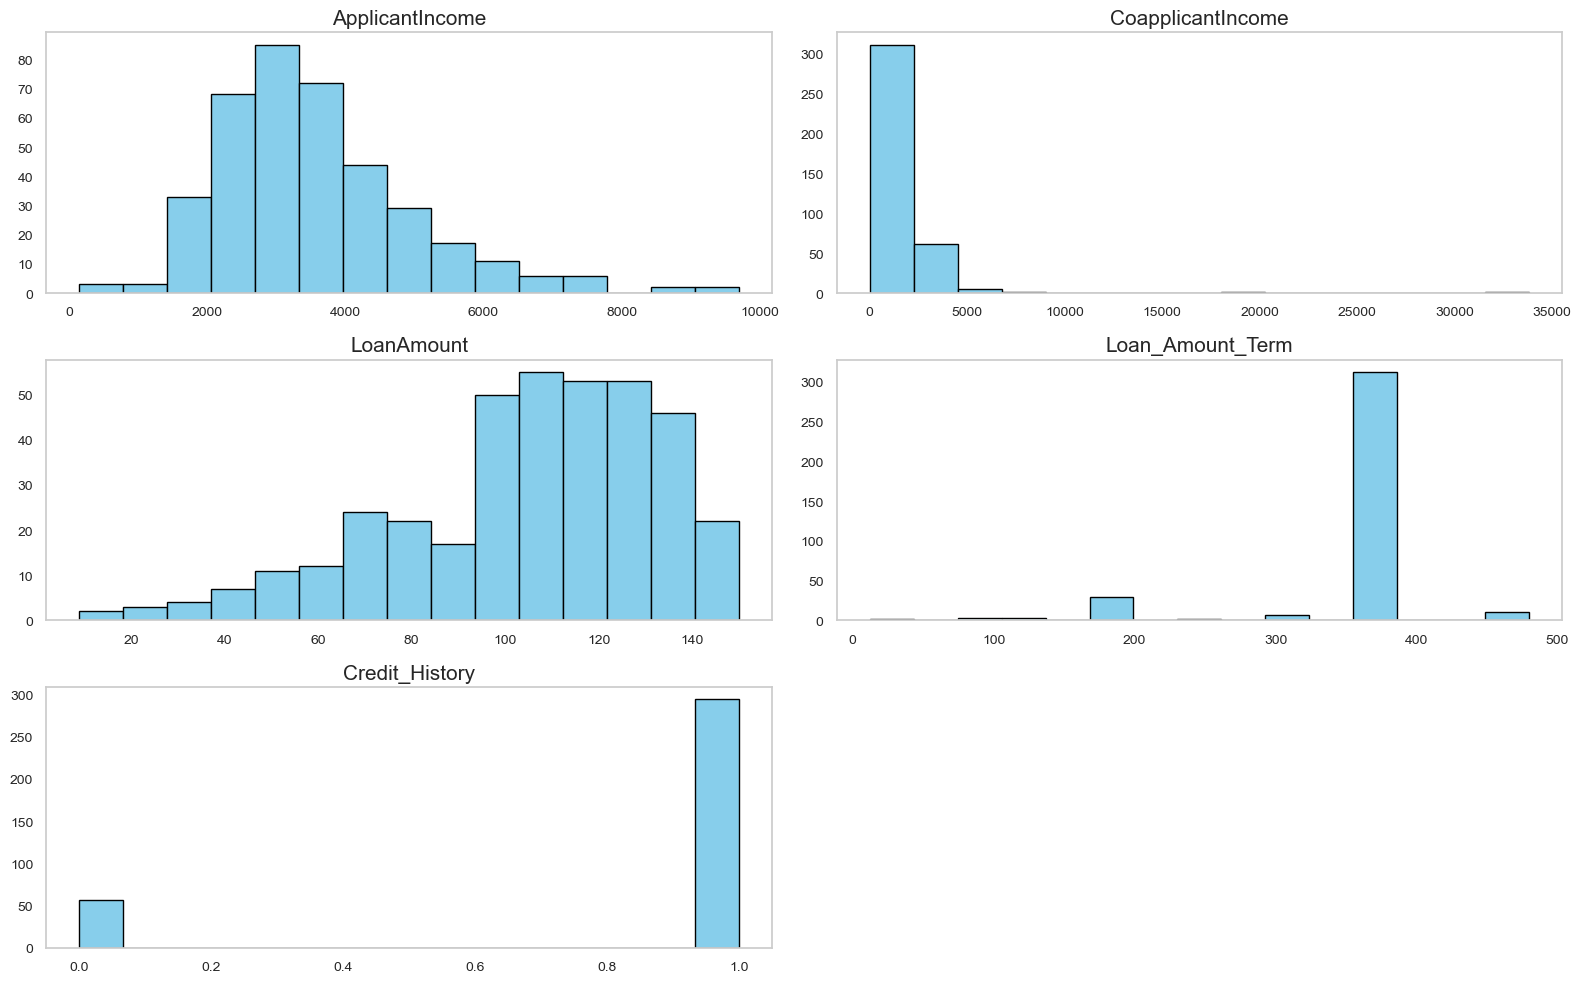

In [119]:
sns.set(style="whitegrid")
plt.rc('font', size=12)
plt.rc('axes', labelsize=13, titlesize=15)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=12)
prestamos.hist(bins=15, figsize=(16, 10), color='skyblue', edgecolor='black', grid=False)

# Ajuste para que no se superpongan los subplots
plt.tight_layout()
plt.show()


<Axes: ylabel='ApplicantIncome'>

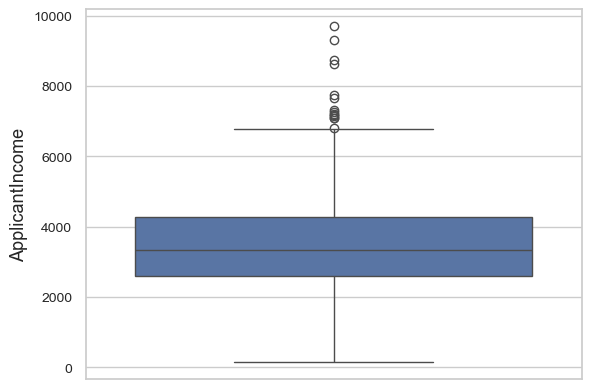

In [120]:
import seaborn as sns
sns.boxplot(data=prestamos['ApplicantIncome'])

<Axes: ylabel='CoapplicantIncome'>

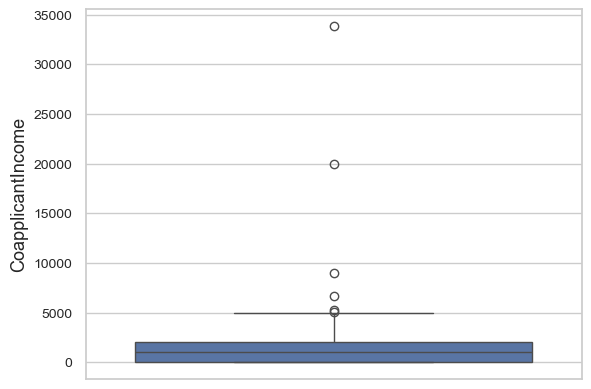

In [121]:
import seaborn as sns
sns.boxplot(data=prestamos['CoapplicantIncome'])

<Axes: ylabel='LoanAmount'>

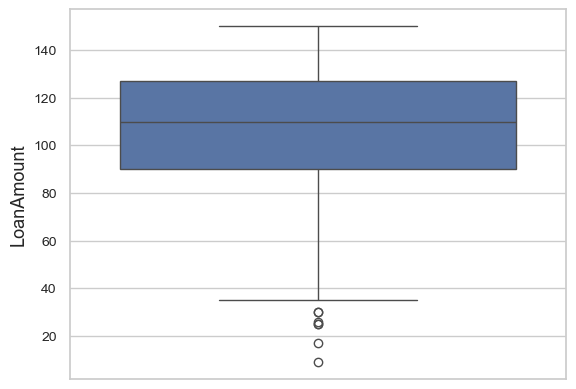

In [122]:
import seaborn as sns
sns.boxplot(data=prestamos['LoanAmount'])

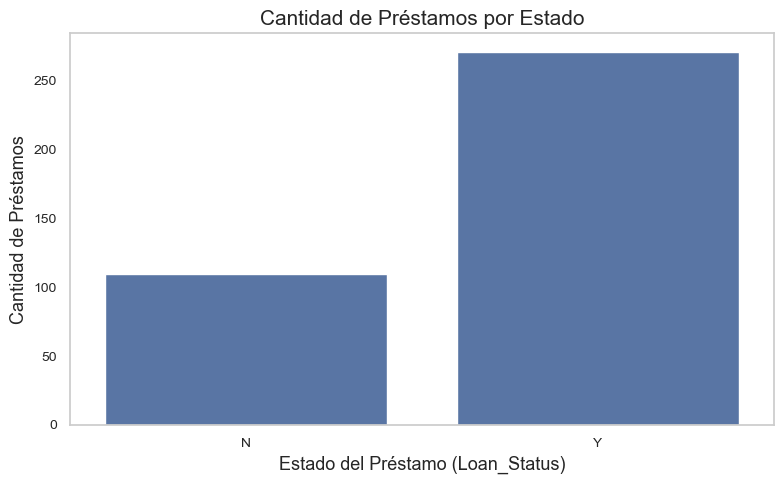

In [123]:


# Gráfico de conteo por estado del préstamo
plt.figure(figsize=(8, 5))
sns.countplot(x='Loan_Status', data=prestamos)
plt.title("Cantidad de Préstamos por Estado")
plt.xlabel("Estado del Préstamo (Loan_Status)")
plt.ylabel("Cantidad de Préstamos")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [124]:
prestamosM = prestamos.melt(var_name="Variable", value_name="Valor")
prestamosM

,Variable,Valor
0,Loan_ID,LP001003
1,Loan_ID,LP001005
2,Loan_ID,LP001006
3,Loan_ID,LP001008
4,Loan_ID,LP001013
...,...,...
4948,Loan_Status,Y
4949,Loan_Status,Y
4950,Loan_Status,Y
4951,Loan_Status,Y


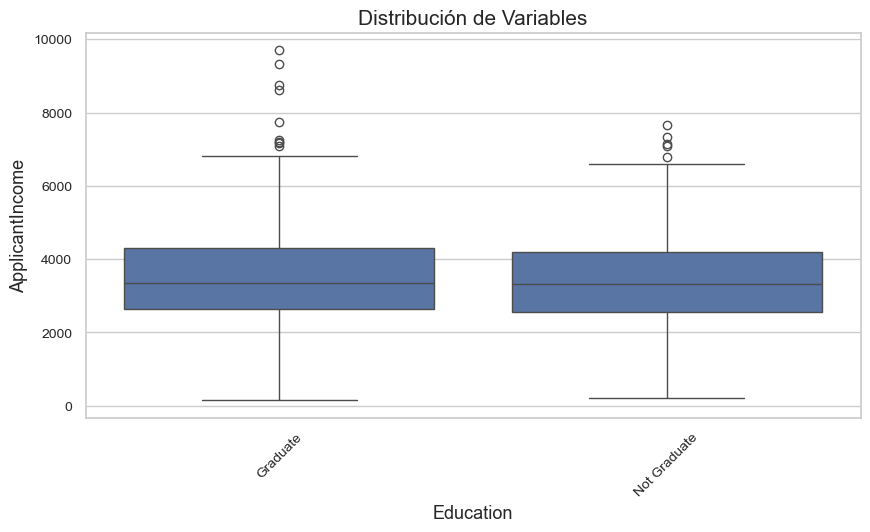

In [125]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.boxplot(x="Education", y="ApplicantIncome", data=prestamos)
plt.title("Distribución de Variables")
plt.xticks(rotation=45)
plt.show()

In [126]:
prestamos.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

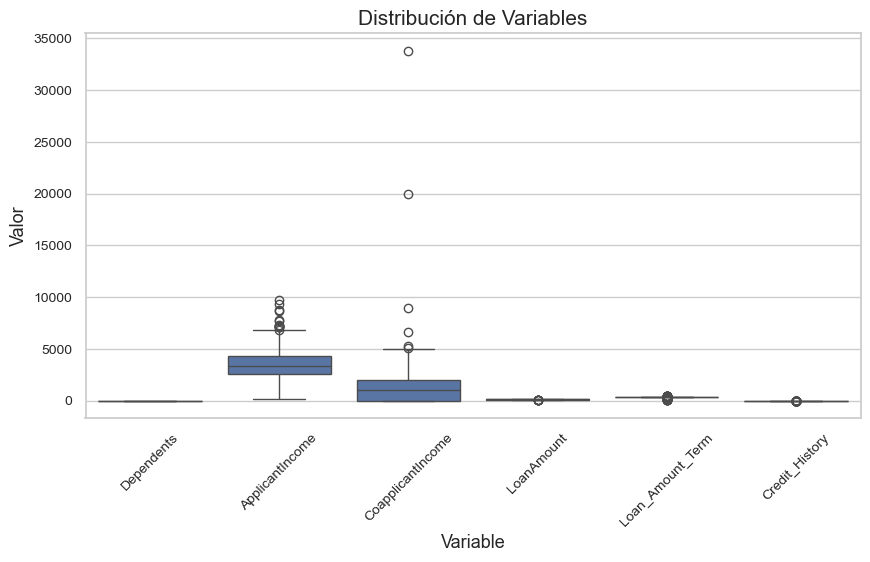

In [127]:
dfMelted = prestamos.melt(var_name="Variable", value_name="Valor")

dfMelted = dfMelted[pd.to_numeric(dfMelted["Valor"], errors="coerce").notnull()]
dfMelted["Valor"] = dfMelted["Valor"].astype(float)

dfMelted
# Generar el boxplot

import seaborn as sns
plt.figure(figsize=(10, 5))
sns.boxplot(x="Variable", y="Valor", data=dfMelted)
plt.title("Distribución de Variables")
plt.xticks(rotation=45)
plt.show()

In [128]:
corr_matrix = prestamos.corr(numeric_only=True)
corr_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.248693,0.270681,-0.109875,0.004535
CoapplicantIncome,-0.248693,1.000000,0.114936,0.001906,0.023015
LoanAmount,0.270681,0.114936,1.000000,0.123579,-0.047899
Loan_Amount_Term,-0.109875,0.001906,0.123579,1.000000,-0.013452
Credit_History,0.004535,0.023015,-0.047899,-0.013452,1.000000


In [129]:
prestamos.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [130]:
type(corr_matrix)

pandas.core.frame.DataFrame

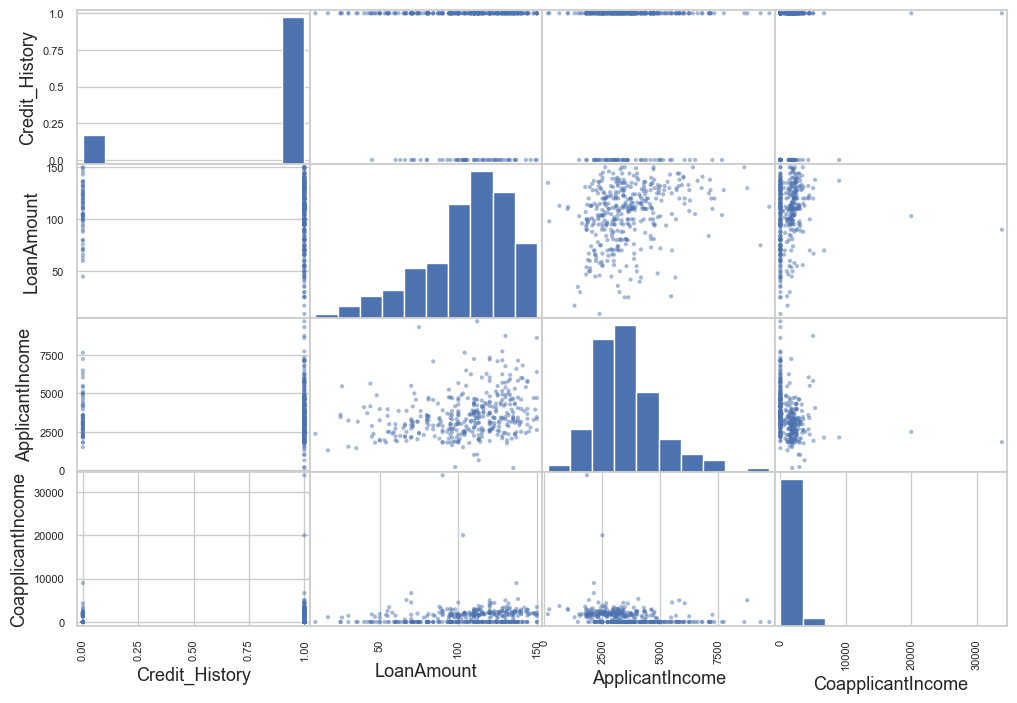

In [131]:
from pandas.plotting import scatter_matrix
 
attributes = ["Credit_History", "LoanAmount","ApplicantIncome", "CoapplicantIncome"]
 
scatter_matrix(prestamos[attributes], figsize=(12, 8))
 
plt.show()

In [132]:
from sklearn.model_selection import train_test_split


In [133]:
prestamos["LoanAmount"].describe()

count    381.000000
mean     104.986877
std       28.358464
min        9.000000
25%       90.000000
50%      110.000000
75%      127.000000
max      150.000000
Name: LoanAmount, dtype: float64

In [134]:
##Estratificación de los datos: cantidad del prestamo(LoanAmount)
prestamos["amount_cat"] = pd.cut(prestamos["LoanAmount"],
                                  bins = [0, 90, 110, 127, 140, np.inf],
                                 labels = [1, 2, 3, 4, 5])
prestamos

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,amount_cat
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,3
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,5
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y,4
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y,2
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,1
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,1


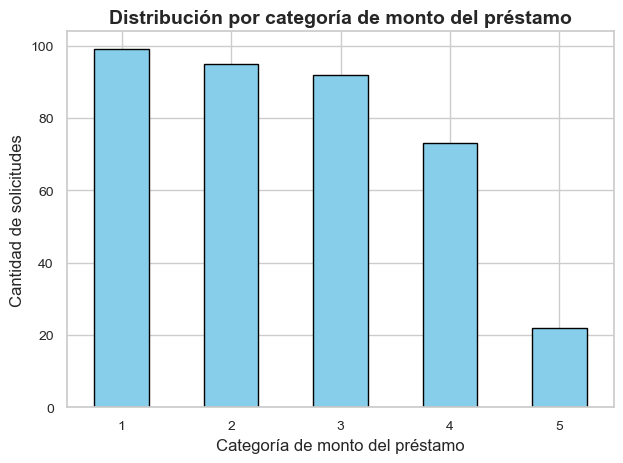

In [135]:
prestamos["amount_cat"].value_counts().sort_index().plot.bar(
    color='skyblue', edgecolor='black', rot=0, grid=True
)

plt.title("Distribución por categoría de monto del préstamo", fontsize=14, fontweight='bold')
plt.xlabel("Categoría de monto del préstamo", fontsize=12)
plt.ylabel("Cantidad de solicitudes", fontsize=12)
plt.tight_layout()
plt.show()


In [136]:
##Estratificación de los datos: ingresos del aplicante(ApplicantIncome)
prestamos["ingresos_cat"] = pd.cut(prestamos["ApplicantIncome"],
                                 bins = [0, 2600, 3333, 4288, 6000, np.inf],
                                   labels = [1, 2, 3, 4, 5])
prestamos

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,amount_cat,ingresos_cat
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4,4
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,2
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,3,1
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,5,4
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y,4,4
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y,2,2
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,1,2
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,1,3


In [137]:
from sklearn.model_selection import train_test_split
 
train_set, test_set = train_test_split(prestamos, test_size=0.2, random_state=42)
 
print('Tamaño del train_set',train_set.shape)
print('Tamaño del test_set',test_set.shape)

Tamaño del train_set (304, 15)
Tamaño del test_set (77, 15)


In [138]:
## Comparacion de sets aleatorios y estratificados
# Función calcula la proporción de cada categoría de ingreso
def amount_cat_proportions(data):
    return data["amount_cat"].value_counts() / len(data)

In [139]:
# Calcular la proporciones del training set aleatorio 
amount_cat_proportions(train_set)

amount_cat
1    0.256579
2    0.243421
3    0.240132
4    0.200658
5    0.059211
Name: count, dtype: float64

In [140]:
prestamos["ApplicantIncome"].describe()

count     381.000000
mean     3579.845144
std      1419.813818
min       150.000000
25%      2600.000000
50%      3333.000000
75%      4288.000000
max      9703.000000
Name: ApplicantIncome, dtype: float64

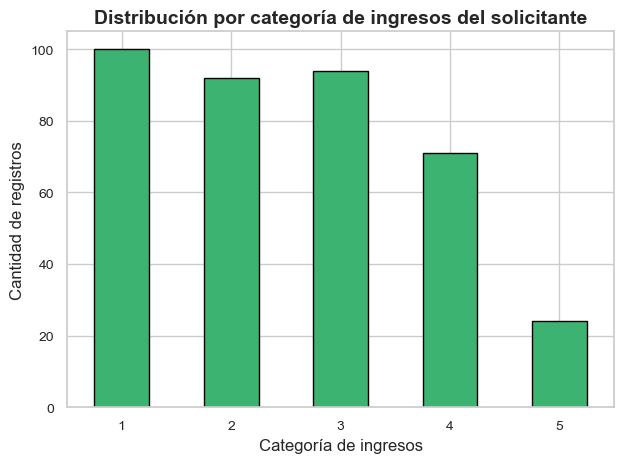

In [141]:
prestamos["ingresos_cat"].value_counts().sort_index().plot.bar(color='mediumseagreen', edgecolor='black',rot=0,grid=True)

plt.title("Distribución por categoría de ingresos del solicitante", fontsize=14, fontweight='bold')
plt.xlabel("Categoría de ingresos", fontsize=12)
plt.ylabel("Cantidad de registros", fontsize=12)
plt.tight_layout()
plt.show()


In [142]:
## Comparacion de sets aleatorios y estratificados
# Función calcula la proporción de cada categoría de ingreso
def ingresos_cat_proportions(data):
    return data["ingresos_cat"].value_counts() / len(data)

In [143]:
# Calcular la proporciones del training set aleatorio 
ingresos_cat_proportions(train_set)

ingresos_cat
3    0.263158
2    0.246711
1    0.243421
4    0.190789
5    0.055921
Name: count, dtype: float64

In [144]:
# Forma de identificar nulos
null_rows_idx = prestamos.isnull().any(axis=1)
print(null_rows_idx[null_rows_idx == True])
prestamos.loc[null_rows_idx].head()

6      True
10     True
13     True
16     True
20     True
       ... 
354    True
361    True
366    True
370    True
375    True
Length: 73, dtype: bool


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,amount_cat,ingresos_cat
6,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y,2,1
10,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y,2,3
13,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y,3,1
16,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N,3,3
20,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y,3,3


In [145]:
print(prestamos.isnull().sum())

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
amount_cat            0
ingresos_cat          0
dtype: int64


In [191]:
#hay_nan_original = prestamosOriginal['Loan_Status'].isnull().any()
prestamos["Loan_Status"] = prestamos["Loan_Status"].map({'Y': 1, 'N': 0})
prestamos["Loan_Status"].head()
print(prestamos["Loan_Status"].unique())

[0 1]


In [192]:
from sklearn.impute import SimpleImputer
 
imputer = SimpleImputer(strategy="median")

## Preprocesamiento

In [193]:
prestamos["ingresos_cat"] = pd.cut(prestamos["ApplicantIncome"],
                                 bins = [0, 2600, 3333, 4288, 6000, np.inf],
                                   labels = [1, 2, 3, 4, 5])
print(prestamos["Loan_Status"].unique())

[0 1]


## Validamos si hay nulos por accidente

In [194]:

hay_nan = prestamos['Loan_Status'].isnull().any()
#print("¿Hay NaN en la columna original?", hay_nan_original)
print("¿Hay NaN en la columna?", hay_nan)

¿Hay NaN en la columna? False


In [195]:
prestamos["Loan_Status"].head()

0    0
1    1
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

## DATOS DE ENTRENAMIENTO ESTRATIFICADOS

In [196]:
#creamos los datasets estratificados
from sklearn.model_selection import train_test_split
strat_train_set, strat_test_set = train_test_split(prestamos, 
                                                   test_size=0.2, 
                                                   stratify=prestamos["ingresos_cat"], 
                                                   random_state=42)
 
print('Tamaño del train_set',strat_train_set.shape)
print('Tamaño del test_set',strat_test_set.shape)

Tamaño del train_set (304, 15)
Tamaño del test_set (77, 15)


In [197]:
# Separar las variables predictivas de la variable objetivo
prestamostrain = strat_train_set.drop("Loan_Status", axis=1)
prestamostrain_labels = strat_train_set["Loan_Status"].copy()
prestamostrain_labels.head()

74     1
44     1
178    1
283    1
293    1
Name: Loan_Status, dtype: int64

In [198]:
#Estos miden la capacidad de pago del solicitante y co-solicitante en relación al préstamo
def income_to_loan(X):
    total_income = X[:, [0]] + X[:, [1]]
    return total_income / (X[:, [2]] + 1e-5)

def income_to_loan_name(transformer, feature_names_in):
    return ["income_to_loan_ratio"]
#Estos sirven para analizar la dependencia del ingreso conjunto
def applicant_to_coapplicant(X):
    return X[:, [0]] / (X[:, [1]] + 1e-5)

def applicant_to_coapplicant_name(transformer, feature_names_in):
    return ["applicant_to_coapplicant_ratio"]
#Estos se usan para ver qué porcentaje del ingreso representa el préstamo
def loan_to_income(X):
    total_income = X[:, [0]] + X[:, [1]]
    return X[:, [2]] / (total_income + 1e-5)

def loan_to_income_name(transformer, feature_names_in):
    return ["loan_to_income_ratio"]
#Estos se usan para ver la carga mensual o anual del solicitante
def loan_to_term(X):
    return X[:, [0]] / (X[:, [1]] + 1e-5)

def loan_to_term_name(transformer, feature_names_in):
    return ["loan_to_term_ratio"]

In [199]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
income_to_loan_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(income_to_loan, feature_names_out=income_to_loan_name),
    StandardScaler()
)

applicant_to_coapplicant_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(applicant_to_coapplicant, feature_names_out=applicant_to_coapplicant_name),
    StandardScaler()
)

loan_to_income_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(loan_to_income, feature_names_out=loan_to_income_name),
    StandardScaler()
)

loan_to_term_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(loan_to_term, feature_names_out=loan_to_term_name),
    StandardScaler()
)
from category_encoders import CountEncoder
# Pipeline para variables categóricas Ordinal
cat_count_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    CountEncoder()
)

# Pipeline para variables numéricas restantes
default_num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [200]:
preprocessing = ColumnTransformer([
    ("income_to_loan", income_to_loan_pipeline, ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]),
    ("applicant_to_coapplicant", applicant_to_coapplicant_pipeline, ["ApplicantIncome", "CoapplicantIncome"]),
    ("loan_to_income", loan_to_income_pipeline, ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]),
    ("loan_to_term", loan_to_term_pipeline, ["LoanAmount", "Loan_Amount_Term"]),
    ("cat", cat_count_pipeline, make_column_selector(dtype_include=object))  # <-- actualizamos esto
], remainder=default_num_pipeline)

In [201]:
# Aplica el preprocesamiento automátizado
X = preprocessing.fit_transform(prestamostrain)
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(304, 14)


In [202]:
prestamostrainProc = pd.DataFrame(X,
                               columns=preprocessing.get_feature_names_out(),
                               index=prestamostrain.index)
prestamostrainProc.head(2)

,income_to_loan__income_to_loan_ratio,applicant_to_coapplicant__applicant_to_coapplicant_ratio,loan_to_income__loan_to_income_ratio,loan_to_term__loan_to_term_ratio,cat__0,cat__1,cat__2,cat__3,cat__4,cat__5,cat__6,remainder__Credit_History,remainder__amount_cat,remainder__ingresos_cat
74,-0.352710,1.461968,0.356319,0.034177,1.0,237.0,130.0,195.0,223.0,275.0,96.0,0.400381,1.198635,1.177683
44,-0.232557,-0.825365,0.024008,0.074821,1.0,237.0,174.0,46.0,81.0,275.0,96.0,0.400381,1.999481,0.367693


# Entranemiento de los modelos

In [203]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, classification_report

## SVC Maquina de soporte vectorial

In [204]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
svc_cls = make_pipeline(preprocessing, SVC(C=10, gamma='auto', class_weight='balanced'))

y_pred_svc = cross_val_predict(svc_cls, prestamostrain, prestamostrain_labels, cv=3)

y_pred_svc[:10]

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [205]:
precision_svc = precision_score(prestamostrain_labels, y_pred_svc)
recall_svc = recall_score(prestamostrain_labels, y_pred_svc)
accuracy_svc = accuracy_score(prestamostrain_labels, y_pred_svc)

print(f"Precisión: {precision_svc}")
print(f"Recall: {recall_svc}")
print(f"Accuracy: {accuracy_svc}")

print("Matriz de confusión:\n", confusion_matrix(prestamostrain_labels, y_pred_svc))
print("Reporte de clasificación:\n", classification_report(prestamostrain_labels, y_pred_svc))

Precisión: 0.7619047619047619
Recall: 0.8262910798122066
Accuracy: 0.6973684210526315
Matriz de confusión:
 [[ 36  55]
 [ 37 176]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.49      0.40      0.44        91
           1       0.76      0.83      0.79       213

    accuracy                           0.70       304
   macro avg       0.63      0.61      0.62       304
weighted avg       0.68      0.70      0.69       304



## Random Forest

In [206]:
from sklearn.ensemble import RandomForestClassifier
 
forest_clf = make_pipeline(
    preprocessing,
    RandomForestClassifier(random_state=42)
)

In [207]:

y_pred_forest = cross_val_predict(forest_clf, prestamostrain, prestamostrain_labels, cv=10)

In [208]:
y_pred_forest

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [209]:
# Random Forest no tiene decision_function, pero si genera la probabilidad de pertenecer a cada clase. 
y_probas_forest = cross_val_predict(forest_clf, prestamostrain, prestamostrain_labels, cv=3,
                                    method="predict_proba")

In [210]:
y_probas_forest[:10]

array([[0.13, 0.87],
       [0.34, 0.66],
       [0.2 , 0.8 ],
       [0.58, 0.42],
       [0.35, 0.65],
       [0.07, 0.93],
       [0.11, 0.89],
       [0.22, 0.78],
       [0.75, 0.25],
       [0.09, 0.91]])

In [211]:
y_scores_forest = y_probas_forest[:, 1]

In [212]:
y_scores_forest[:10]

array([0.87, 0.66, 0.8 , 0.42, 0.65, 0.93, 0.89, 0.78, 0.25, 0.91])

In [213]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
forest_presicion = precision_score(prestamostrain_labels,y_pred_forest, average='macro')

In [214]:
forest_presicion

0.7908232118758434

In [215]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Calcular métricas
precision = precision_score(prestamostrain_labels, y_pred_forest, average='macro')
recall = recall_score(prestamostrain_labels, y_pred_forest, average='macro')
accuracy = accuracy_score(prestamostrain_labels, y_pred_forest)

print(f"Precisión: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")

Precisión: 0.7908232118758434
Recall: 0.7112418098333592
Accuracy: 0.8026315789473685


In [216]:
# Entrenar en todo el conjunto de entrenamiento
forest_clf.fit(prestamostrain, prestamostrain_labels)

# Predecir en el conjunto de prueba
prestamostest = strat_test_set.drop("Loan_Status", axis=1)
prestamostest_labels = strat_test_set["Loan_Status"].copy()

y_pred_test = forest_clf.predict(prestamostest)

# Evaluar en el conjunto de prueba
test_precision = precision_score(prestamostest_labels, y_pred_test, average='macro')
print(f"Precisión en test: {test_precision}")

Precisión en test: 0.8700980392156863


In [217]:
print("Accuracy:", accuracy_score(prestamostrain_labels, y_pred_forest))
print("Matriz de confusión:\n", confusion_matrix(prestamostrain_labels, y_pred_forest))
print("Reporte de clasificación:\n", classification_report(prestamostrain_labels, y_pred_forest))

Accuracy: 0.8026315789473685
Matriz de confusión:
 [[ 44  47]
 [ 13 200]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.77      0.48      0.59        91
           1       0.81      0.94      0.87       213

    accuracy                           0.80       304
   macro avg       0.79      0.71      0.73       304
weighted avg       0.80      0.80      0.79       304



## LogisticRegression

In [219]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

# Usar regresión logística en lugar de lineal
log_reg = make_pipeline(preprocessing, LogisticRegression(max_iter=2000))


# Predicciones de clase
y_pred = cross_val_predict(log_reg, prestamostrain, prestamostrain_labels, cv=3)
print("Predicciones de clase:", y_pred[:5])

# Predicciones de probabilidad
y_proba = cross_val_predict(log_reg, prestamostrain, prestamostrain_labels, cv=3, method='predict_proba')[:, 1]
print("Probabilidades:", y_proba[:5])

Predicciones de clase: [1 1 1 0 1]
Probabilidades: [0.84629775 0.88671648 0.77264274 0.36924127 0.70468676]


In [220]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(prestamostrain_labels, y_pred))
print("Matriz de confusión:\n", confusion_matrix(prestamostrain_labels, y_pred))
print("Reporte de clasificación:\n", classification_report(prestamostrain_labels, y_pred))

Accuracy: 0.8256578947368421
Matriz de confusión:
 [[ 48  43]
 [ 10 203]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.83      0.53      0.64        91
           1       0.83      0.95      0.88       213

    accuracy                           0.83       304
   macro avg       0.83      0.74      0.76       304
weighted avg       0.83      0.83      0.81       304



In [221]:
df = prestamostrain.copy()
df["Loan_Status"] = prestamostrain_labels

correlaciones = df.corr(numeric_only=True)["Loan_Status"].sort_values(ascending=False)
print(correlaciones)

Loan_Status          1.000000
Credit_History       0.581380
LoanAmount           0.017546
CoapplicantIncome    0.013778
ApplicantIncome      0.012895
Loan_Amount_Term    -0.073363
Name: Loan_Status, dtype: float64


## Afinamiento de datos

## GridSearchCV

In [222]:
from sklearn.model_selection import GridSearchCV

In [223]:
param_grid = {
    "randomforestclassifier__n_estimators": [200, 300],
    "randomforestclassifier__max_depth": [5, 10, 15],  
    "randomforestclassifier__max_features": ["sqrt", "log2"],  
    "randomforestclassifier__min_samples_split": [5, 10], 
    "randomforestclassifier__min_samples_leaf": [2, 4],  
    "randomforestclassifier__class_weight": ["balanced"] 
}

grid_search = GridSearchCV(forest_clf, param_grid, cv=15)

In [177]:
import time
 
inicio = time.time()
grid_search.fit(prestamostrain,  prestamostrain_labels) 
fin = time.time()
(fin - inicio) / 60  


1.9046583294868469

In [178]:
cv_res = pd.DataFrame(grid_search.cv_results_)

In [179]:
cv_res[:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__class_weight,param_randomforestclassifier__max_depth,param_randomforestclassifier__max_features,param_randomforestclassifier__min_samples_leaf,param_randomforestclassifier__min_samples_split,param_randomforestclassifier__n_estimators,...,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
0,0.120921,0.001784,0.009234,0.000410,balanced,5,sqrt,2,5,200,...,0.8,0.85,0.80,0.9,0.80,0.80,0.9,0.800476,0.073675,11
1,0.169127,0.002050,0.010588,0.000453,balanced,5,sqrt,2,5,300,...,0.8,0.85,0.80,0.9,0.80,0.80,0.9,0.794127,0.084183,25
2,0.119281,0.001198,0.009243,0.000592,balanced,5,sqrt,2,10,200,...,0.8,0.85,0.75,0.9,0.85,0.80,0.9,0.803651,0.071083,7
3,0.168278,0.001498,0.010323,0.000502,balanced,5,sqrt,2,10,300,...,0.8,0.85,0.85,0.9,0.80,0.80,0.9,0.803968,0.084124,5
4,0.119766,0.002010,0.009188,0.000630,balanced,5,sqrt,4,5,200,...,0.8,0.85,0.80,0.9,0.80,0.75,0.9,0.793651,0.067044,31


In [180]:
#mejores parametros
print(grid_search.best_params_)
print(grid_search.best_score_)

{'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': 15, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 200}
0.8073015873015873


## Ramdomize

In [181]:
from sklearn.model_selection import RandomizedSearchCV

In [182]:
param_dist = {
    "randomforestclassifier__n_estimators": [300, 500, 800],       
    "randomforestclassifier__max_depth": [10, 20, None],           
    "randomforestclassifier__max_features": ["sqrt", "log2", None],
    "randomforestclassifier__min_samples_split": [2, 5, 10],       
    "randomforestclassifier__min_samples_leaf": [1, 2, 4],         
    "randomforestclassifier__class_weight": ["balanced"]           
}


In [183]:
random_search = RandomizedSearchCV(
    estimator=forest_clf,            
    param_distributions=param_dist,  
    n_iter=10,                        
    cv=15,                            
    scoring="f1_macro",               
    verbose=2,                       
    random_state=42,
    n_jobs=-1                         
)

In [184]:
import time
 
inicio = time.time()
random_search.fit(prestamostrain,  prestamostrain_labels) 
fin = time.time()
(fin - inicio) / 60 

Fitting 15 folds for each of 10 candidates, totalling 150 fits


0.09196132818857829

In [185]:
print(random_search.best_params_)

{'randomforestclassifier__n_estimators': 300, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__class_weight': 'balanced'}


In [186]:
print(random_search.best_score_)

0.7247864008751107


# Evaluar el modelo con el "test set"

## estamos probando diferentes formas

In [187]:
final_model = random_search.best_estimator_

In [188]:
type(final_model)

sklearn.pipeline.Pipeline

In [224]:
#evaluar el modelo con el "test set"

from sklearn.metrics import mean_squared_error
from scipy import stats
import numpy as np
import pandas as pd

X_test = strat_test_set.drop("Loan_Status", axis=1)
y_test = strat_test_set["Loan_Status"]


final_predictions = final_model.predict(X_test)



# Cálculo del RMSE
final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
print("Final RMSE:", final_rmse)


squared_errors = (final_predictions - y_test) ** 2

# Evitar NaN
sem = stats.sem(squared_errors)
if np.isnan(sem):
    interval = (final_rmse, final_rmse)
else:
    interval = np.sqrt(
        stats.t.interval(
            0.95,
            len(squared_errors) - 1,
            loc=squared_errors.mean(),
            scale=sem
        )
    )

print("Intervalo de confianza 95% del RMSE:", interval)


ValueError: could not convert string to float: 'Y'

In [103]:
from sklearn.utils import resample
from sklearn.metrics import log_loss


n_bootstraps = 1000
logloss_bootstrap = []

for _ in range(n_bootstraps):
    # Crear muestra bootstrap
    X_resampled, y_resampled = resample(X_test, y_test)
    
    # Obtener probabilidades de la clase positiva
    probs_resampled = final_model.predict_proba(X_resampled)[:, 1]
    
    # Calcular log loss para la muestra bootstrap
    logloss_resampled = log_loss(y_resampled, probs_resampled)
    
    # Guardar el resultado
    logloss_bootstrap.append(logloss_resampled)

# Calcular percentiles para intervalo de confianza 95%
lower = np.percentile(logloss_bootstrap, 2.5)
upper = np.percentile(logloss_bootstrap, 97.5)

print(f"Intervalo de confianza 95% del Log Loss (bootstrap): [{lower:.4f}, {upper:.4f}]")

Intervalo de confianza 95% del Log Loss (bootstrap): [0.3417, 0.4797]


### quizas hay que hacerlo diferente

In [104]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.utils import resample
import numpy as np


final_model = grid_search.best_estimator_


X_test = strat_test_set.drop("Loan_Status", axis=1)
y_test = strat_test_set["Loan_Status"]


final_predictions = final_model.predict(X_test)
final_proba = final_model.predict_proba(X_test)[:, 1]


accuracy = accuracy_score(y_test, final_predictions)
print(" Resultados en Test Set:")
print(f"Accuracy     : {accuracy:.4f}")


n_bootstraps = 1000
logloss_bootstrap = []

for _ in range(n_bootstraps):
    X_resampled, y_resampled = resample(X_test, y_test)
    
    probs_resampled = final_model.predict_proba(X_resampled)[:, 1]
    
    logloss_resampled = log_loss(y_resampled, probs_resampled)
    logloss_bootstrap.append(logloss_resampled)

lower = np.percentile(logloss_bootstrap, 2.5)
upper = np.percentile(logloss_bootstrap, 97.5)

print(f"\nIC 95% del Log Loss (bootstrap): [{lower:.4f}, {upper:.4f}]")




 Resultados en Test Set:
Accuracy     : 0.8961

IC 95% del Log Loss (bootstrap): [0.3920, 0.5124]
